Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[George McNinch](http://gmcninch.math.tufts.edu) <george.mcninch@tufts.edu>  
*Fall 2020*

Course material (Week 7): Example: financial markets
--------------------------------------------------------

Financial market example
=========================

Consider the state of a financial market from week to week. 

- by a *bull market* we mean a week of generally rising prices. 
- by a *bear market* we mean a week of genreally declining prices.
- by a *recession* we mean a general slowdown of the economy.

Empirical observation shows for each of these three states what the probability of the state for the subsequent week, as follows:

|                  | *bull*   | *bear*   | *recession*| 
| :--------------- | -------: | -------: | ---------: |
|     followed by bull         | 0.90     | 0.15     | 0.25      |
|     followed by bear         | 0.075    | 0.80     | 0.25       |
|     followed by recession    | 0.025    | 0.05     | 0.50       |

In words, the first col indicates that if one has a bull market, then 90% of the time the next week is a bull market, 7.5% of the time the next week is a bear market, and 2.5% of the time the next week is in recession.

Probabilities
-------------

Let's number the weeks we are going to consider $k=0,1,2,...$.
We can represent the probability that week $k$ is a bull market, a bear market, or in recession using a vector in $\mathbb{R}^3$:

$$\mathbf{x}^{(k)} = \begin{bmatrix}
\text{bull market prob.} \\
\text{bear market prob.} \\
\text{recession prob.}
\end{bmatrix}
=\begin{bmatrix}
\alpha_k \\
\beta_k \\
\gamma_k
\end{bmatrix}$$

We'd like to describe the probabilities describing the next week -- i.e. the vector $\mathbf{x}^{(k+1)}$.

Observe that if we *knew for sure* that week $k$ was a bear market, then $\mathbf{x}^{(k)} = \mathbf{e}_1 = 
\begin{bmatrix} 
1 \\ 0 \\ 0 
\end{bmatrix}$.
But then we have more-or-less been told what $\mathbf{x}^{(k+1)}$ is -- it must be 
$$\mathbf{x}^{(k+1)} = \begin{bmatrix}
0.90\\
0.075 \\
0.025
\end{bmatrix}.$$

In the general case, we see if $\mathbf{x}^{(k)} = \begin{bmatrix}
\alpha_k \\
\beta_k \\
\gamma_k
\end{bmatrix}$, then
$$\mathbf{x}^{(k+1)} = \alpha_k \begin{bmatrix}
0.90\\
0.075 \\
0.025
\end{bmatrix} + 
\beta_k \begin{bmatrix}
0.15\\
0.8 \\
0.05
\end{bmatrix} +
\gamma_k \begin{bmatrix}
0.25\\
0.25 \\
0.5
\end{bmatrix} = A \cdot \begin{bmatrix} \alpha_k \\ \beta_k \\ \gamma_k \end{bmatrix} = A \cdot \mathbf{x}^{(k)}$$
where
$$A = \begin{bmatrix}
0.90 & 0.15 & 0.25 \\
0.075 & 0.80  & 0.25  \\
.025 & 0.05  & 0.50 
\end{bmatrix}$$

In [30]:
import numpy as np
from numpy.linalg import matrix_power
from itertools import product

A = np.array([[0.90 , 0.15 , 0.25],
              [0.075, 0.80 , 0.25],
              [0.025, 0.05 , 0.50]])

states = ["bull","bear","recess"]

prob = {(a,b):A[states.index(a)][states.index(b)] for (a,b) in product(states,states)}

prob

{('bull', 'bull'): 0.9,
 ('bull', 'bear'): 0.15,
 ('bull', 'recess'): 0.25,
 ('bear', 'bull'): 0.075,
 ('bear', 'bear'): 0.8,
 ('bear', 'recess'): 0.25,
 ('recess', 'bull'): 0.025,
 ('recess', 'bear'): 0.05,
 ('recess', 'recess'): 0.5}

In [23]:
print("\n".join([f"week of {a:6} ---> week of {b:6}: {prob[(a,b)]}" for (a,b) in prob.keys()]))

week of bull   ---> week of bull  : 0.9
week of bull   ---> week of bear  : 0.15
week of bull   ---> week of recess: 0.25
week of bear   ---> week of bull  : 0.075
week of bear   ---> week of bear  : 0.8
week of bear   ---> week of recess: 0.25
week of recess ---> week of bull  : 0.025
week of recess ---> week of bear  : 0.05
week of recess ---> week of recess: 0.5


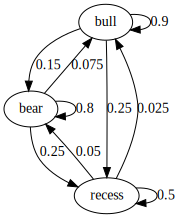

In [15]:
from graphviz import Digraph

fin = Digraph("financial")

## make the nodes
for a in states:
    fin.node(a)

## make and label the edges
for a,b in prob.keys():
    fin.edge(a,b,f"{prob[(a,b)]}")


fin

In [37]:
def sbv(index,size):
    return np.array([1.0 if i == index-1 else 0.0 for i in range(size)])

state_vector = {"bull":sbv(1,3),
                "bear":sbv(2,3),
                "recess":sbv(3,3)}

def state(p_bull,p_bear,p_recess):
    if 1==(p_bull + p_bear + p_recess):
        return sum([p_bull*state_vector["bull"],
                    p_bear*state_vector["bear"],
                    p_recess*state_vector["recess"]],
                    np.zeros(3))
    else:
        raise Exception("Probabilities must add to 1")
        
[A @ state_vector["bull"],
 A @ state(1,0,0),
 A @ state(.5,.5,0)]

[array([0.9  , 0.075, 0.025]),
 array([0.9  , 0.075, 0.025]),
 array([0.525 , 0.4375, 0.0375])]

**Q1**
======

If there is a bear market in week $k$, what probabilities describe the market state 3 weeks later (i.e. in week $k+3$)?

**Q2**
=======

Compute A^50. What do you observe? What about A^100?

Explain what seems to happen to the vector $A^j \cdot \mathbf{x}^{(0)}$ for large $j$.


In [ ]:
matrix_power(A,50)

**Q3**
======
In the long run, what do you think the probability of a bull market is? Does this probability depend on the starting state of the market?

In [ ]:
**Q3**. In the long run, what do you think the probability of a bull market is? Does this probability depend on the starting state of the market

Bipartite Graphs & Matching
===========================

Bi-partite graphs
------------------

Let $G$ be an (undirected) graph with vertex set $V$ and edge set $E$.

Suppose that we can divide the vertices into two disjoint collections --
i.e. suppose that we can represent $V$ as a *disjoint union*:

$$V = U \cup W.$$


Recall that an edge $e$ of $G$ connects two vertices: $e = [x,y]$ for
$x,y \in V$.  We say that $G$ is a *bi-partite* graph if for each edge
$e = [x,y]$, we have $x \in U$ and $y \in W$ (or vice versa). In
words, every edge connects a vertex in $U$ and a vertex in $W$.

Thus, we do not allow edges to connect a pair of vertices in $U$ or a
pair of vertices in $W$.

Matchings
---------

Let $G$ be a bi-partite graph, and suppose its vertex set $V$ is
written as a disjoint union $U \cup W$ as above.

A *matching* in $G$ is a set $M$ of edges in $E$ with the property that
no two edges in $M$ have a common vertex.

- A matching $M$ is *maximal* if $M \cup \{e\}$ is not a matching for
  any edge $e \not \in M$. 
  
  Thus $M$ is maximal if no larger set of edges is a matching.
  
- A matching $M$ has *maximum size* if there are no matchings $\tilde
  M$ in $G$ for which $|M| < |\tilde M|$ where $|X|$ denotes the
  *cardinality* of a set $X$ (i.e. $|X|$ denotes the number of
  elements in $X$, at least when $X$ is finite).
  
  Thus the matching $M$ has maximum size if there are no matchings
  with more edges.

- A matching is *perfect* if every vertex in $V$ is adjacent to one
  edge in the matching.



In [52]:
import numpy as np
from scipy.optimize import linprog
from itertools import product

## the function find_matching defined below finds a maximal matching
## for a bi-partite graph

## the graph is given by 3 pieces of data: a set `U`, a set `W`, and a
## set `edge` of pairs (u,v) in the product U x V

## the matching is found by solving a linear program. Recall that we
## first associate a directed graph to the bi-partite graph, and solve
## the ``max-flow`` linear program for that directed graph.

def sbv(index,size):
    return np.array([1.0 if i == index else 0.0 for i in range(size)])

def to_vector(l,X):
    ## argument X is a list, and l is a list of elements from X.
    ## suppose that l=[x1,x2,...,xm] and suppose that
    ## n1,n2,...,nm are the indices of the xi in the list X.
    ## 
    ## this function returns the sum of the standard basis vectors
    ## sbv(ni,#X) for i =1,...,m
    ii = map(X.index,l)
    return sum([sbv(i,len(X)) for i in ii],np.zeros(len(X)))

def find_matching(U,W,edges):
    UW = list(product(U,W))

    edge_dict = {(u,w):True if (u,w) in edges else False for (u,w) in UW}
    
    def U_node(x):
        # compute the row-vector corresponding to the conservation law
        # for nodes in U the directed graph has an edge s -> u for
        # each u in U, and an edge w -> t for each w in W, as well as
        # the edges u->w coming from the original bi-partite graph.
        # Thus the rows of the constraint matrix for the linear program
        # have length #U + (#U)(#W) + #W
        return np.block([to_vector([x],U),
                         (-1)*to_vector([(x,w) for w in W if edge_dict[(x,w)]],UW),
                         np.zeros(len(W))])
                     

    def W_node(x):
        # compute the row-vector corresponding to the conservation law for a node in W
        # this row again has length #U + (#U)(#W) + #W.
        return np.block([np.zeros(len(U)),
                         (-1)*to_vector([(u,x) for u in U if edge_dict[(u,x)]],UW),
                         to_vector([x],W)])

    ## construct the equality constraint matrix from conservation laws
    A = np.array([U_node(x) for x in U] + [W_node(x) for x in W])

    ## construct the row for the objective function
    c = np.block([np.ones(len(U)), np.zeros(len(UW)), np.zeros(len(W))])

    lp_result = linprog((-1)*c,
                        A_eq=A,
                        b_eq=np.zeros(len(U) + len(W)),
                        bounds=(0,1),
                        method='revised simplex')

    def compare(r,targ=0,ee=1e-5):
        return True if np.abs(r-targ)<ee else False

    def extract(vec):
        pv = [vec[k + len(U)] for k in range(len(UW))]
        test = [True if compare(x,1) or compare(x,0) else False for x in pv]
        if all(test):
            match = [(u,w)  for (u,w) in UW if compare(pv[UW.index((u,w))],1)]
            return match
        else:
            raise Exception("linprog solution not of correct form.")

    match=extract(lp_result.x)
    
    if lp_result.success:
        return match
    else:
        raise Exception("linprog failed")
    

def display_matching(U,W,edges):
    UW = list(product(U,W))
    match = find_matching(U,W,edges)
    l = [f"length of matching: {len(match)}"] 
    s = [f"{u}  ---> {w}" for (u,w) in match]
    return "\n".join(l+s)



In [54]:
U =list(range(15))
W =list(range(15))

edges = [(u,np.mod(3*u,15)) for u in range(15)] + [(u,np.mod(5*u,15)) for u in range(15)]
print(display_matching(U,W,edges))

length of matching: 7
0  ---> 0
1  ---> 5
2  ---> 6
3  ---> 9
4  ---> 12
5  ---> 10
6  ---> 3


NameError: name 'append' is not defined